<a href="https://colab.research.google.com/github/DarshaPadmanban/24ADI003_24BAD017/blob/main/24BAD017_ML_EXP_4(SC_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [4]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding="latin-1")
df.head()
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dataset Sample:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Model Performance
Accuracy: 0.967713004484305
Precision: 1.0
Recall: 0.76
F1 Score: 0.8636363636363636

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


Misclassified Messages:

Message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 084

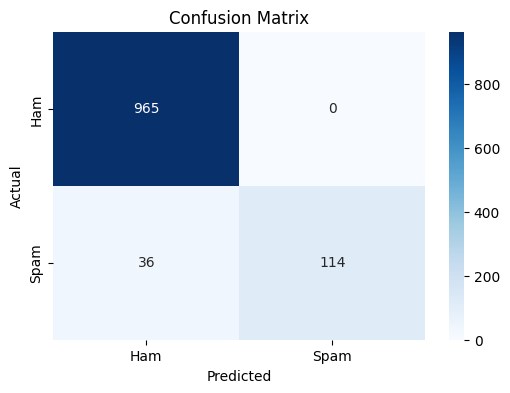

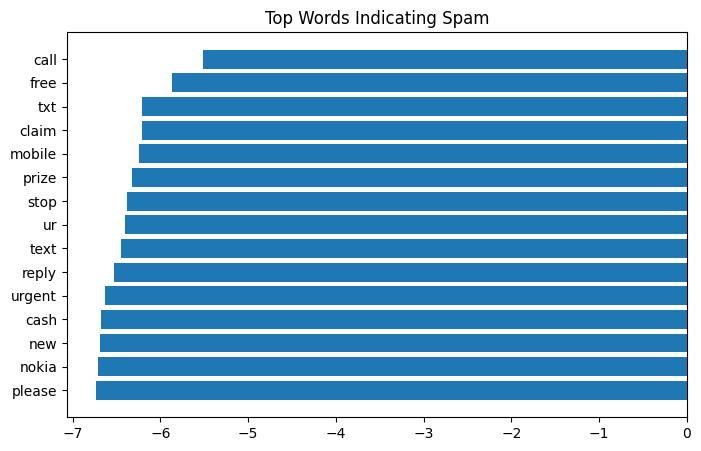

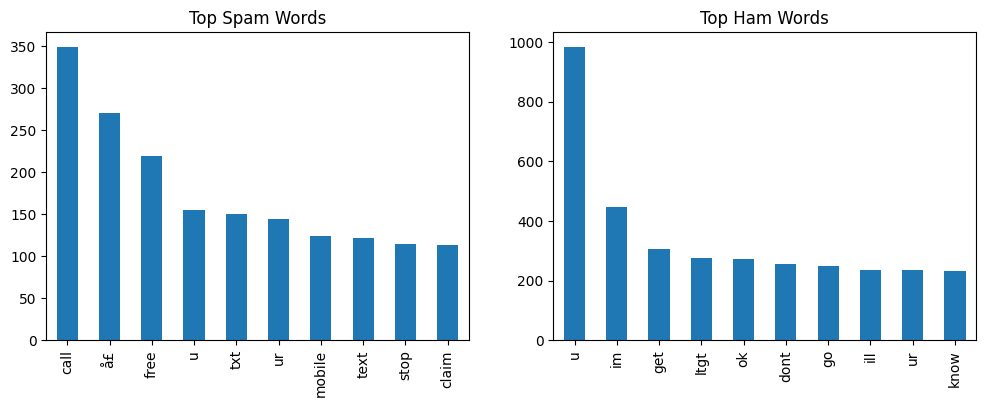

In [5]:
# ================================
# SMS SPAM CLASSIFICATION PROJECT
# Multinomial Naive Bayes
# ================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

nltk.download('stopwords')

# ================================
# 2. Load Dataset
# ================================
df = pd.read_csv("spam.csv", encoding="latin-1")

# Keep only required columns
df = df[['v1','v2']]
df.columns = ['label','message']

print("Dataset Sample:")
print(df.head())

# ================================
# 3. Data Preprocessing
# ================================
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                           # lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # remove punctuation
    text = re.sub(r"\d+", "", text)               # remove numbers
    words = text.split()
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return " ".join(words)

df["clean_message"] = df["message"].apply(clean_text)

# ================================
# 4. Convert Text → Numerical Features (TF-IDF)
# ================================
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_message"])

# ================================
# 5. Encode Target Labels
# ================================
encoder = LabelEncoder()
y = encoder.fit_transform(df["label"])  # ham=0, spam=1

# ================================
# 6. Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================
# 7. Train Multinomial Naive Bayes (Laplace smoothing alpha=1)
# ================================
model = MultinomialNB(alpha=1)
model.fit(X_train, y_train)

# ================================
# 8. Prediction
# ================================
y_pred = model.predict(X_test)

# ================================
# 9. Model Evaluation
# ================================
print("\nModel Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ================================
# 10. Misclassified Examples
# ================================
print("\nMisclassified Messages:")
test_indices = X_test.nonzero()[0]
misclassified_indices = np.where(y_test != y_pred)[0]

for i in misclassified_indices[:10]:
    print("\nMessage:", df.iloc[i]["message"])
    print("Actual:", encoder.inverse_transform([y_test[i]])[0])
    print("Predicted:", encoder.inverse_transform([y_pred[i]])[0])

# ================================
# 11. Laplace Smoothing Comparison
# ================================
print("\nLaplace Smoothing Impact:")
alphas = [0.1, 1, 5]

for a in alphas:
    temp_model = MultinomialNB(alpha=a)
    temp_model.fit(X_train, y_train)
    pred = temp_model.predict(X_test)
    print(f"Alpha = {a} → Accuracy:", accuracy_score(y_test, pred))

# ================================
# Visualization
# ================================

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ham","Spam"],
            yticklabels=["Ham","Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ================================
# Feature Importance (Top Spam Words)
# ================================
feature_names = vectorizer.get_feature_names_out()
spam_prob = model.feature_log_prob_[1]
top_spam_words = np.argsort(spam_prob)[-15:]

plt.figure(figsize=(8,5))
plt.barh(feature_names[top_spam_words], spam_prob[top_spam_words])
plt.title("Top Words Indicating Spam")
plt.show()

# ================================
# Word Frequency Comparison (Spam vs Ham)
# ================================
spam_msgs = df[df["label"]=="spam"]["clean_message"]
ham_msgs = df[df["label"]=="ham"]["clean_message"]

spam_words = " ".join(spam_msgs).split()
ham_words = " ".join(ham_msgs).split()

spam_freq = pd.Series(spam_words).value_counts()[:10]
ham_freq = pd.Series(ham_words).value_counts()[:10]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
spam_freq.plot(kind="bar")
plt.title("Top Spam Words")

plt.subplot(1,2,2)
ham_freq.plot(kind="bar")
plt.title("Top Ham Words")

plt.show()